<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-1">Regression</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.1">Linear Regression</a></span></li><li><span><a href="#SKLearn" data-toc-modified-id="SKLearn-1.2">SKLearn</a></span></li></ul></li></ul></div>

## Regression

In general, regression is the fitting of an optimized line or curve (in the form of an equation or system of equations) that best describe the relationships between the variables at play.

Single-variable linear regression is to take data and find a trend line that best describes the relationship between the independent variable (in our case, square feet of living space) and the dependent variable (the sale price of a home).

With supervised machine learning, everying boils down to labels and features.

### Linear Regression
The simplest example is linear regression, fitting a straight line to data. Our point-slope form for a linear equation is the familiar $$y = mx+b$$

So we must find the slope coefficient (m) and the initial-value (b).

We will be using __[a dataset of Allegheny County, PA Property Assessment Parcel data](https://data.wprdc.org/dataset/property-assessments)__.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data/AlleghenyHousing/assessments.csv', low_memory=False)

print(df.head())

              PARID  PROPERTYHOUSENUM PROPERTYFRACTION PROPERTYADDRESS  \
0  0001G00224060300             151.0                   FORT PITT BLVD   
1  0001G00224060400             151.0                   FORT PITT BLVD   
2  0001G00224060500             151.0                   FORT PITT BLVD   
3  0002M00222000000              40.0                     VAN BRAAM ST   
4  0002M00223000000              42.0                     VAN BRAAM ST   

  PROPERTYCITY PROPERTYSTATE PROPERTYUNIT  PROPERTYZIP  MUNICODE  \
0   PITTSBURGH            PA     UNIT 603      15222.0       101   
1   PITTSBURGH            PA     UNIT 604      15222.0       101   
2   PITTSBURGH            PA     UNIT 605      15222.0       101   
3   PITTSBURGH            PA                   15219.0       101   
4   PITTSBURGH            PA                   15219.0       101   

                 MUNIDESC    ...      HALFBATHS HEATINGCOOLING  \
0  1st Ward  - PITTSBURGH    ...            0.0              B   
1  1st Ward  -

We are obviously going to be dealing with a great deal of data, but we should probably get an idea of exactly how big and wiley the data is. Lets see how many columns there are, how many rows exist, and what the column titles are:

In [2]:
print(len(df.columns))
print(df.index)

86
RangeIndex(start=0, stop=578221, step=1)


We have 86 columns and 578221 rows.

In [3]:
df.columns

Index(['PARID', 'PROPERTYHOUSENUM', 'PROPERTYFRACTION', 'PROPERTYADDRESS',
       'PROPERTYCITY', 'PROPERTYSTATE', 'PROPERTYUNIT', 'PROPERTYZIP',
       'MUNICODE', 'MUNIDESC', 'SCHOOLCODE', 'SCHOOLDESC', 'LEGAL1', 'LEGAL2',
       'LEGAL3', 'NEIGHCODE', 'NEIGHDESC', 'TAXCODE', 'TAXDESC', 'TAXSUBCODE',
       'TAXSUBCODE_DESC', 'OWNERCODE', 'OWNERDESC', 'CLASS', 'CLASSDESC',
       'USECODE', 'USEDESC', 'LOTAREA', 'HOMESTEADFLAG', 'FARMSTEADFLAG',
       'CLEANGREEN', 'ABATEMENTFLAG', 'RECORDDATE', 'SALEDATE', 'SALEPRICE',
       'SALECODE', 'SALEDESC', 'DEEDBOOK', 'DEEDPAGE', 'PREVSALEDATE',
       'PREVSALEPRICE', 'PREVSALEDATE2', 'PREVSALEPRICE2',
       'CHANGENOTICEADDRESS1', 'CHANGENOTICEADDRESS2', 'CHANGENOTICEADDRESS3',
       'CHANGENOTICEADDRESS4', 'COUNTYBUILDING', 'COUNTYLAND', 'COUNTYTOTAL',
       'COUNTYEXEMPTBLDG', 'LOCALBUILDING', 'LOCALLAND', 'LOCALTOTAL',
       'FAIRMARKETBUILDING', 'FAIRMARKETLAND', 'FAIRMARKETTOTAL', 'STYLE',
       'STYLEDESC', 'STORIES', 'YEARBL

Fortunately we have a dictionary that we can compare this against. Lets see what the dictionary says:

In [4]:
df_dict = pd.read_csv('Data/AlleghenyHousing/assessment_dictionary.csv', encoding = "ISO-8859-1")
print(df_dict.head())

         Field Name Data Type and Length  \
0             PARID                  A30   
1  PROPERTYHOUSENUM              NBR(10)   
2  PROPERTYFRACTION                   A6   
3   PROPERTYADDRESS                  A80   
4      PROPERTYCITY                  A50   

                         Field Description         Example 1  \
0             Parcel Identification Number  0023S00162000000   
1           Property Location House Number               514   
2  Property Location House Number Fraction               NaN   
3            Property Location Street Name         E OHIO ST   
4              Property Location City Name        PITTSBURGH   

          Example 2                            Additional Data Details  
0  1468J00244000000   A 16 character unique identifier for the parcel.  
1                69  House Number for the  physical location of pro...  
2               -73  Continued House Number information for the  ph...  
3        STROUSS RD  Street name for the  physical locatio

In [5]:
print(df_dict.columns)
print(df_dict.index)

Index(['Field Name', 'Data Type and Length', 'Field Description', 'Example 1',
       'Example 2', 'Additional Data Details'],
      dtype='object')
RangeIndex(start=0, stop=86, step=1)


In [6]:
print(df_dict['Field Name'])

0                  PARID
1       PROPERTYHOUSENUM
2       PROPERTYFRACTION
3        PROPERTYADDRESS
4           PROPERTYCITY
5          PROPERTYSTATE
6           PROPERTYUNIT
7            PROPERTYZIP
8               MUNICODE
9               MUNIDESC
10            SCHOOLCODE
11            SCHOOLDESC
12                LEGAL1
13                LEGAL2
14                LEGAL3
15             NEIGHCODE
16             NEIGHDESC
17               TAXCODE
18               TAXDESC
19            TAXSUBCODE
20       TAXSUBCODE_DESC
21             OWNERCODE
22             OWNERDESC
23                 CLASS
24             CLASSDESC
25               USECODE
26               USEDESC
27               LOTAREA
28         HOMESTEADFLAG
29            CLEANGREEN
             ...        
56       FAIRMARKETTOTAL
57                 STYLE
58             STYLEDESC
59               STORIES
60               YEARBLT
61        EXTERIORFINISH
62        EXTFINISH_DESC
63                  ROOF
64              ROOFDESC


In [7]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None, 
                       'display.max_colwidth', -1): # show the whole entire df
    display(df_dict)

,Field Name,Data Type and Length,Field Description,Example 1,Example 2,Additional Data Details
0,PARID,A30,Parcel Identification Number,0023S00162000000,1468J00244000000,A 16 character unique identifier for the parcel.
1,PROPERTYHOUSENUM,NBR(10),Property Location House Number,514,69,House Number for the physical location of property; may be zero or blank.
2,PROPERTYFRACTION,A6,Property Location House Number Fraction,NaN,-73,"Continued House Number information for the physical location of property; such as 1/2, the house number ending range, or a letter."
3,PROPERTYADDRESS,A80,Property Location Street Name,E OHIO ST,STROUSS RD,"Street name for the physical location of the property, including directional indicators and suffixes."
4,PROPERTYCITY,A50,Property Location City Name,PITTSBURGH,IMPERIAL,City where the property is physically located.
5,PROPERTYSTATE,A50,Property Location State Name,PA,PA,State where the property is physically located.
6,PROPERTYUNIT,A30,Property Location Unit Number,NaN,NaN,"Unit numbers for the property, such as condo units (e.g. 1, 3C, 115A, B13, etc .)."
7,PROPERTYZIP,A10,"Property Location Zip code, first 5 digits",15212,15126,Zip Code where the property is physically located.
8,MUNICODE,A5,Municipality Code (Tax District),123,910,Municipality number associated with specified parcel.
9,MUNIDESC,A50,Municipality Name,23rd Ward - PITTSBURGH,Findlay,Municipality name associated with specified parcel.


In [8]:
n = 0
for i in df.columns:
    n+=1
print(n)

86


In [9]:
for i in df_dict['Field Description']:
    if 'value' in i.lower() and 'total' in i.lower(): print(i)
    if 'sale' in i.lower() and 'validity' not in i.lower() and 'date' not in i.lower(): print(i)
    if 'area' in i.lower(): print(i)
    if 'year' in i.lower(): print(i)
    if 'date' in i.lower(): print(i)

#for i in df_dict['Field Description']:
#    if 'dwelling' in i.lower(): print(i)

Sum of Area of Land
Record Date
Sale Date
Sale Price
Previous Sale Date
Previous Sale Price
Previous Sale Date 2
Previous Sale Price 2
County Assessed Value Total
Local Assessed Value Total
Fair Market Total Value
Dwelling - Year Built
Dwelling - Total Square Feet of Living Area
The current certified tax year
The run date of this file


For the sake of exercise we're going to pretend like the size of the home and the sale price are the only factors we care about. Later we can come back and figure out which factors correlate with sale price, and to what degree.

In order to simplify our data, we'll search the 'Field Description' column of our data set dictionary to find the features that contain information about the total appraisal value, sale price, and area (sq. footage) of the home.

We'll use a loop, an iterator, and some formatting tricks to create a revised dataframe, called df_r, that contains only the columns corresponding to the features we're interested in.

Once we've done that, we can move on.

In [10]:
#display(df.iloc[0:5])
''.join(pd.DataFrame(df.iloc[:, 3]).columns.format())

'PROPERTYADDRESS'

In [11]:
my_list = []
n = 0

for i in df_dict['Field Description']:
    if 'value' in i.lower() and 'total' in i.lower(): my_list.append(''.join(pd.DataFrame(df.iloc[:, n]).columns.format()))
    if 'sale' in i.lower() and 'validity' not in i.lower() and 'date' not in i.lower(): my_list.append(''.join(pd.DataFrame(df.iloc[:, n]).columns.format()))
    if 'area' in i.lower(): my_list.append(''.join(pd.DataFrame(df.iloc[:, n]).columns.format()))
    if 'year' in i.lower(): my_list.append(''.join(pd.DataFrame(df.iloc[:, n]).columns.format()))
    if 'date' in i.lower(): my_list.append(''.join(pd.DataFrame(df.iloc[:, n]).columns.format()))
    n+=1

my_list


['LOTAREA',
 'RECORDDATE',
 'SALEDATE',
 'SALEPRICE',
 'PREVSALEDATE',
 'PREVSALEPRICE',
 'PREVSALEDATE2',
 'PREVSALEPRICE2',
 'COUNTYTOTAL',
 'LOCALTOTAL',
 'FAIRMARKETTOTAL',
 'YEARBLT',
 'FINISHEDLIVINGAREA',
 'TAXYEAR',
 'ASOFDATE']

In [12]:
df_r = df[my_list]

df_r

,LOTAREA,RECORDDATE,SALEDATE,SALEPRICE,PREVSALEDATE,PREVSALEPRICE,PREVSALEDATE2,PREVSALEPRICE2,COUNTYTOTAL,LOCALTOTAL,FAIRMARKETTOTAL,YEARBLT,FINISHEDLIVINGAREA,TAXYEAR,ASOFDATE
0,0,10-05-2017,09-29-2017,699000.0,10-25-2013,460000.0,08-23-2007,389745.0,592900,610900,610900,2007.0,1761.0,2018,01-SEP-18
1,0,08-20-2012,08-20-2012,350000.0,08-23-2007,350000.0,NaN,NaN,295600,313600,313600,2007.0,1275.0,2018,01-SEP-18
2,0,09-18-2009,09-18-2009,265000.0,07-30-2007,235000.0,NaN,NaN,227800,227800,227800,2007.0,888.0,2018,01-SEP-18
3,1350,NaN,08-14-1995,25550.0,NaN,NaN,NaN,NaN,24600,24600,24600,1905.0,1200.0,2018,01-SEP-18
4,1350,NaN,08-14-1995,45550.0,NaN,NaN,NaN,NaN,58000,58000,58000,1905.0,3225.0,2018,01-SEP-18
5,1680,NaN,06-06-1984,85000.0,NaN,NaN,NaN,NaN,11500,11500,11500,NaN,NaN,2018,01-SEP-18
6,2880,05-05-2017,05-03-2017,250000.0,02-07-2013,170000.0,04-22-1992,55528.0,150000,150000,150000,NaN,NaN,2018,01-SEP-18
7,1440,11-10-2016,11-08-2016,113000.0,04-21-1980,15000.0,NaN,NaN,87300,87300,87300,NaN,NaN,2018,01-SEP-18
8,1440,05-05-2017,05-03-2017,250000.0,02-07-2013,170000.0,04-22-1992,55528.0,14500,14500,14500,NaN,NaN,2018,01-SEP-18
9,2880,NaN,12-17-1982,35000.0,NaN,NaN,NaN,NaN,157200,157200,157200,NaN,NaN,2018,01-SEP-18


We can see that there are many missing pices of data, and a brief inspection of what's missing or apparently skewed tells us a few things. 
* some of these entries are plots of land that do not contain a home, so we will discard these rows
* some of these are not homes, but rather are apartments or condos which have a living area but no land area
* some of these homes do not have sale prices or have sale prices effectively equal to zero, but have appraised values
* some of these homes have sale prices from dates far in the past and are no longer relevant
* if we do not have a date to go with our sale price, we can't relate the value to time, and so we will discard any rows where this may occur
* all other outliers we'll consider to be due to other factors, such as deeds that include adjacent lots and features which significantly alter the value of the home, such as neighborhood crime rates or in-ground pools and furnishings, such as gifts and affectionate sale prices

We also see that for all entries this file is relevant as of September 2018, and that the appraised values are for the year 2018. From research we know that the economy has changed significantly in Allegheny county in the past 10 years, so we'll plan to separate or remove any sales that occurred more than 8 years ago.

For Sales that occurred within those 8 years, we'll determine wether the sale price was much lower than than the appraisal value and consider those to be exceptions (such as affectionate sale prices) and eliminate them from our set. Once we do all of that, we'll see what's left of our data.

In [13]:
# first we'll eliminate and ignore some more of the data

df_r = df_r[['LOTAREA',
 'SALEDATE',
 'SALEPRICE',
 'COUNTYTOTAL',
 'LOCALTOTAL',
 'FAIRMARKETTOTAL',
 'FINISHEDLIVINGAREA']]

In [14]:
df_r.head()

,LOTAREA,SALEDATE,SALEPRICE,COUNTYTOTAL,LOCALTOTAL,FAIRMARKETTOTAL,FINISHEDLIVINGAREA
0,0,09-29-2017,699000.0,592900,610900,610900,1761.0
1,0,08-20-2012,350000.0,295600,313600,313600,1275.0
2,0,09-18-2009,265000.0,227800,227800,227800,888.0
3,1350,08-14-1995,25550.0,24600,24600,24600,1200.0
4,1350,08-14-1995,45550.0,58000,58000,58000,3225.0


In [15]:
# drop any rows for plots of land not containing finished living area
import math

n = 0
my_list = []

for i in df_r['FINISHEDLIVINGAREA']:
    if math.isnan(i) == True:   
        my_list.append(n)
    n+=1

print("Total number entries before dropping:", len(df_r['FINISHEDLIVINGAREA']))
print("Number of entries to be dropped:", len(my_list))

Total number entries before dropping: 578221
Number of entries to be dropped: 134282


In [16]:
df_r.drop(df_r.index[[my_list]], inplace = True)

c:\program files\python37\lib\site-packages\pandas\core\indexes\base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
c:\program files\python37\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
# reset the index
df_r = df_r.reset_index(drop=True)

In [18]:
display(df_r.head(31))
display(df_r.tail(31))

,LOTAREA,SALEDATE,SALEPRICE,COUNTYTOTAL,LOCALTOTAL,FAIRMARKETTOTAL,FINISHEDLIVINGAREA
0,0,09-29-2017,699000.0,592900,610900,610900,1761.0
1,0,08-20-2012,350000.0,295600,313600,313600,1275.0
2,0,09-18-2009,265000.0,227800,227800,227800,888.0
3,1350,08-14-1995,25550.0,24600,24600,24600,1200.0
4,1350,08-14-1995,45550.0,58000,58000,58000,3225.0
5,3297,12-24-2015,240000.0,52200,52200,52200,1600.0
6,1015,03-15-1982,10667.0,7900,25900,25900,1122.0
7,476,03-15-1982,5334.0,14200,14200,14200,544.0
8,995,10-14-2015,1754901.0,1614500,1614500,1614500,2011.0
9,0,11-15-2007,525000.0,325400,343400,343400,1520.0


,LOTAREA,SALEDATE,SALEPRICE,COUNTYTOTAL,LOCALTOTAL,FAIRMARKETTOTAL,FINISHEDLIVINGAREA
443908,5052,05-21-2004,205900.0,173200,191200,191200,2096.0
443909,28706,03-10-2018,1.0,768200,786200,786200,4994.0
443910,43734,03-14-2008,1.0,172400,190400,190400,1568.0
443911,217887,12-29-2014,1.0,761600,779600,779600,4504.0
443912,23958,05-31-2012,650000.0,632000,650000,650000,3883.0
443913,14984,10-11-2017,650000.0,683100,683100,683100,3982.0
443914,21048,07-03-2018,31000.0,195500,195500,195500,3808.0
443915,0,09-18-2002,1.0,30600,48600,48600,920.0
443916,0,08-06-1998,1116000.0,132500,150500,150500,1170.0
443917,15000,10-05-1977,1.0,84200,102200,102200,924.0


Okay, now lets do it again for affectionate, outdated, or otherwise skewed sale prices. We'll drop any relevant sales at prices that were 50% more or less than the appraisal cost. Relevant sales, in our opinion, occurred within 8 years of the appraisal date. First off, we format the sale dates, then we calculate the ratio of sale price to fair market value.

In [19]:
df_r['SALEDATE'] = pd.to_datetime(df_r['SALEDATE'])

df_r['SALEDATE'].dtype

dtype('<M8[ns]')

In [20]:
df_r['SALE_DIVBY_MARKET'] = pd.DataFrame(df_r['SALEPRICE'] / df_r['FAIRMARKETTOTAL'])

df_r['SALE_DIVBY_MARKET']

0         1.144213
1         1.116071
2         1.163301
3         1.038618
4         0.785345
5         4.597701
6         0.411853
7         0.375634
8         1.086963
9         1.528829
10        1.063151
11        1.000396
12        1.019220
13        1.101322
14        0.000003
15        1.144078
16        0.956633
17        1.413824
18        1.083815
19        0.000003
20        1.144465
21        1.102359
22        1.093812
23        1.027468
24        1.000000
25        1.052191
26        1.050786
27        1.000117
28        1.192308
29        1.098742
            ...   
443909    0.000001
443910    0.000005
443911    0.000001
443912    1.000000
443913    0.951544
443914    0.158568
443915    0.000021
443916    7.415282
443917    0.000010
443918    1.302521
443919    1.074074
443920    1.113480
443921    0.000004
443922    1.125238
443923    0.010582
443924    0.316092
443925    1.233589
443926    0.720000
443927    1.368078
443928    1.052241
443929    0.000005
443930    0.

Now we go through and drop any entries that fit our drop criteria.

In [21]:
len(df_r)

443939

In [22]:
my_list = []

for i in range(len(df_r)):
    if (df_r['SALE_DIVBY_MARKET'][i] < 0.50) or (df_r['SALE_DIVBY_MARKET'][i] > 1.50) or (df_r['SALEDATE'][i] < pd.to_datetime('9-1-2010')):
        my_list.append(i)

my_list

[2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 14,
 18,
 19,
 21,
 23,
 26,
 29,
 30,
 32,
 36,
 38,
 39,
 41,
 43,
 44,
 46,
 47,
 52,
 60,
 61,
 62,
 65,
 70,
 72,
 75,
 80,
 83,
 84,
 86,
 90,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 165,
 166,
 167,
 168,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 190,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 224,
 225,
 226,
 230,
 231,
 232,
 233,
 234,
 235,
 237,
 238,
 239,
 241,
 242,
 243,
 244,
 246,
 247,
 248,
 251,
 252,
 253,
 254,
 257,
 260,
 263,
 264,
 267,
 27

In [23]:
len(df_r) - len(my_list)

100550

In [24]:
df_r.drop(df_r.index[[my_list]], inplace = True)
len(df_r)

c:\program files\python37\lib\site-packages\pandas\core\indexes\base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


100550

In [25]:
df_r = df_r.reset_index(drop=True)
display(df_r)

,LOTAREA,SALEDATE,SALEPRICE,COUNTYTOTAL,LOCALTOTAL,FAIRMARKETTOTAL,FINISHEDLIVINGAREA,SALE_DIVBY_MARKET
0,0,2017-09-29,699000.0,592900,610900,610900,1761.0,1.144213
1,0,2012-08-20,350000.0,295600,313600,313600,1275.0,1.116071
2,995,2015-10-14,1754901.0,1614500,1614500,1614500,2011.0,1.086963
3,0,2014-07-09,425000.0,367900,385900,385900,1324.0,1.101322
4,0,2017-04-25,455000.0,379700,397700,397700,1761.0,1.144078
5,0,2013-08-28,300000.0,295600,313600,313600,1275.0,0.956633
6,0,2017-09-15,315000.0,222800,222800,222800,888.0,1.413824
7,1485,2012-08-06,305000.0,248500,266500,266500,1485.0,1.144465
8,0,2010-11-04,274000.0,232500,250500,250500,1172.0,1.093812
9,1,2013-06-06,350000.0,332000,350000,350000,1475.0,1.000000


There we have it, a data set of 100550 livable properties sold within the last 8 years within 50% of their appraised 2018 fair market value, including their appraisal prices, sale prices, and square feet of living area.

### SKLearn

We'll import the following things `from skLearn`:

* `preprocessing`: for scaling our data (most usually performed on features) to values between -1 and 1 in order to facilitate accuracy and processing speed, though not always necessary or helpful in reality
* `cross_validation`: used to create training and testing samples, shuffles data and helps ensure statistically unbiased and accurate training
* `svm`: support vector machines can be used to perform regression and easily change the algroithm that is being used

We'll also import the following `from sklearn.linear_model`:

* `LinearRegression`: this simply is what it is, though we'll learn exactly how a linear regression works and write our own algorithm

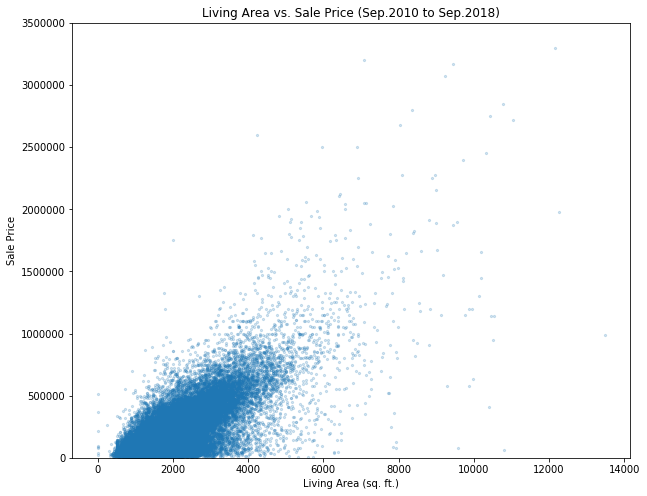

In [60]:
import numpy as np
import pandas as pd
import math
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array(df_r['FINISHEDLIVINGAREA'])
y = np.array(df_r['SALEPRICE'])

# Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, title="Living Area vs. Sale Price (Sep.2010 to Sep.2018)")
ax.scatter(X, y, s=5, alpha=0.2)
plt.xlabel('Living Area (sq. ft.)')
plt.ylabel('Sale Price')
plt.ylim(0, 3500000)
plt.show()